# Predicting Aircraft crash 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import scipy
%matplotlib inline

In [2]:
df=pd.read_csv('ntsb-aviation-accident-dataset.csv', sep=';')

In [3]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,geo_point
0,20170110X14448,Accident,GAA17CA108,2016-12-31,"Casa Grande, AZ",United States,32.956389,-111.763889,CGZ,CASA GRANDE MUNI,...,NaN,NaN,NaN,NaN,1.0,VMC,APPROACH,Factual,NaN,"32.956389, -111.763889"
1,20161120X44929,Accident,ERA17FA052,2016-11-19,"New Gretna, NJ",United States,39.664722,-74.468056,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,VMC,NaN,Preliminary,NaN,"39.664722, -74.468056"
2,20160922X85052,Accident,GAA16CA502,2016-08-24,"St. Augustine, FL",United States,29.959167,-81.339722,SGJ,NORTHEAST FLORIDA RGNL,...,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Factual,NaN,"29.959167, -81.339722"
3,20160720X01138,Accident,CEN16LA273,2016-07-18,"Lodi, WI",United States,43.333334,-89.520834,9WN5,LODI LAKELAND,...,NaN,NaN,NaN,NaN,1.0,VMC,CRUISE,Factual,NaN,"43.333334, -89.520834"
4,20160104X02458,Accident,WPR16LA045,2016-01-01,"Newman Lake, WA",United States,47.822500,-117.068889,NaN,Warners Airstrip,...,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING,Preliminary,NaN,"47.8225, -117.068889"


In [4]:
df.columns

Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description',
       'Schedule', 'Purpose of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase of Flight', 'Report Status',
       'Publication Date', 'geo_point'],
      dtype='object')

In [5]:
df.shape

(162800, 32)

In [6]:
# Calculate percentage of NaN values in each column
df.isna().sum()/len(df)*100

Event Id                   0.000000
Investigation Type         0.003686
Accident Number            0.000000
Event Date                 0.000000
Location                   0.095209
Country                    0.627150
Latitude                  60.125307
Longitude                 60.136978
Airport Code              41.921990
Airport Name              39.128378
Injury Severity            0.000000
Aircraft Damage            3.433047
Aircraft Category         63.843980
Registration Number        3.618550
Make                       0.104423
Model                      0.136364
Amateur Built              0.812039
Number of Engines          5.499386
Engine Type                5.737101
FAR Description           63.933661
Schedule                  84.340909
Purpose of Flight          6.115479
Air Carrier               94.995086
Total Fatal Injuries      35.931204
Total Serious Injuries    38.760442
Total Minor Injuries      37.146806
Total Uninjured           18.164619
Weather Condition          3

Variables which have over 50 % of NaN values were excluded in features.<br>
: Latitude 60/Longitude 60/Airport Code 41/Aircraft Category  63/ FAR Description 63/ Schedule 84/Air Carrier 94/Publication Date 55/ geo_point 60

In [7]:
# drop NaN values only in variables which might be used as features
df=df.dropna(axis=0, subset=['Event Date', 'Location', 'Country', 
       'Airport Name', 'Aircraft Damage',
       'Registration Number', 'Make', 'Model', 'Amateur Built',
       'Number of Engines', 'Engine Type', 'Purpose of Flight',
       'Weather Condition', 'Broad Phase of Flight', 'Report Status'])
print(df.isna().sum()/len(df)*100)
print(df.shape)

Event Id                   0.000000
Investigation Type         0.000000
Accident Number            0.000000
Event Date                 0.000000
Location                   0.000000
Country                    0.000000
Latitude                  60.088777
Longitude                 60.109859
Airport Code               6.374880
Airport Name               0.000000
Injury Severity            0.000000
Aircraft Damage            0.000000
Aircraft Category         65.088660
Registration Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur Built              0.000000
Number of Engines          0.000000
Engine Type                0.000000
FAR Description           65.013703
Schedule                  92.483193
Purpose of Flight          0.000000
Air Carrier               97.114146
Total Fatal Injuries      35.924434
Total Serious Injuries    37.142489
Total Minor Injuries      34.738001
Total Uninjured           14.914151
Weather Condition          0

In [8]:
df

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,geo_point
0,20170110X14448,Accident,GAA17CA108,2016-12-31,"Casa Grande, AZ",United States,32.956389,-111.763889,CGZ,CASA GRANDE MUNI,...,NaN,NaN,NaN,NaN,1.0,VMC,APPROACH,Factual,NaN,"32.956389, -111.763889"
2,20160922X85052,Accident,GAA16CA502,2016-08-24,"St. Augustine, FL",United States,29.959167,-81.339722,SGJ,NORTHEAST FLORIDA RGNL,...,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Factual,NaN,"29.959167, -81.339722"
3,20160720X01138,Accident,CEN16LA273,2016-07-18,"Lodi, WI",United States,43.333334,-89.520834,9WN5,LODI LAKELAND,...,NaN,NaN,NaN,NaN,1.0,VMC,CRUISE,Factual,NaN,"43.333334, -89.520834"
14,20001211X15759,Accident,MIA92LA188,1992-09-21,"ORLANDO, FL",United States,NaN,NaN,ORL,ORLANDO EXECUTIVE,...,NaN,0.0,0.0,0.0,1.0,VMC,APPROACH,Probable Cause,NaN,NaN
16,20001211X12240,Accident,SEA93FA088,1993-04-06,"CASPER, WY",United States,NaN,NaN,CPR,NATRONA COUNTY INT'L,...,NaN,4.0,0.0,0.0,0.0,IMC,APPROACH,Probable Cause,NaN,NaN
19,20001211X12548,Accident,CHI93FA193,1993-06-08,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,...,NaN,1.0,0.0,0.0,0.0,IMC,TAKEOFF,Probable Cause,NaN,NaN
22,20001212X16757,Accident,CHI91LA128,1991-04-09,"OAK ISLAND, MN",United States,NaN,NaN,NaN,UNK,...,NaN,0.0,0.0,0.0,4.0,VMC,TAXI,Probable Cause,NaN,NaN
23,20001212X16710,Incident,ANC91IA052,1991-04-08,"EEK, AK",United States,NaN,NaN,EEK,EEK,...,NaN,0.0,0.0,0.0,6.0,VMC,LANDING,Probable Cause,NaN,NaN
28,20001212X22969,Incident,MIA90IA109,1990-04-24,"MIAMI, FL",United States,NaN,NaN,NaN,MIAMI INTERNATIONAL,...,NaN,0.0,0.0,0.0,3.0,VMC,TAKEOFF,Probable Cause,NaN,NaN
31,20001213X29031,Incident,ATL89IA187,1989-08-02,"GREENSBORO, NC",United States,NaN,NaN,GSO,GREENSBORO,...,NaN,0.0,0.0,0.0,106.0,VMC,LANDING,Probable Cause,NaN,NaN


# Exploratory Analysis

## Country

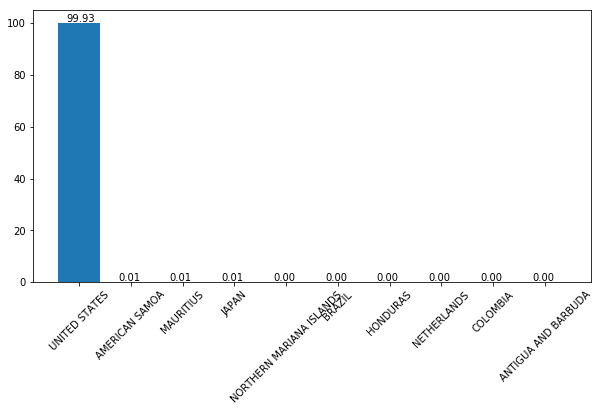

In [9]:
df['Country']=df['Country'].str.upper()
cntry=df['Country'].value_counts()
cntry=cntry/sum(cntry)*100
plt.figure(figsize=(10,5))
plt.bar(cntry[:10].index,cntry[:10])
plt.gca().tick_params(axis='x', rotation=45)

xlocs=range(0,10)
y=cntry[:10]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.5, format(v, '.2f'))

Since over 95% of the data are the crash that happened in the US, I decided to only include the data from the US

In [10]:
df=df[df['Country']=='UNITED STATES']

## Event date

In [11]:
df['Event Date']=pd.to_datetime(df['Event Date'], format='%Y-%m-%d')

/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


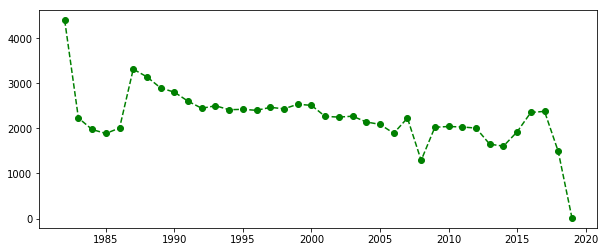

In [12]:
# Yearly trend for airplane crashes
year=pd.DatetimeIndex(df['Event Date']).year
yrcrash=df['Event Date'].groupby(year).count()
plt.figure(figsize=(10,4))
plt.plot(yrcrash,'go--',marker='o')

There are roughly increasing trend over year without 1982.

/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


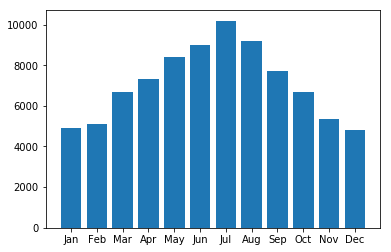

In [13]:
#Monthly trend
month=pd.DatetimeIndex(df['Event Date']).month
moncrash=df['Event Id'].groupby(month).count()
plt.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],moncrash)
df['Month']=month

Air crashes tend to occur the most during summer. This might be that there are high demand and more air travels in summer. It would be possible to check this possibility if there is a information for number of flights.

/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


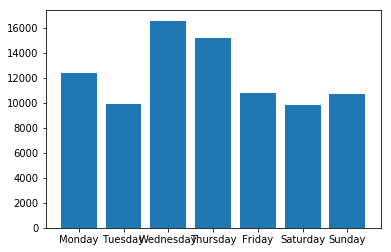

In [14]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day=pd.DatetimeIndex(df['Event Date']).weekday_name
daycrush=df['Event Id'].groupby(day).count()
plt.bar(daycrush.index, daycrush,tick_label=day_order)
df['Day']=day

Air crashes occured on Wednesday the most. It also might be due to more flights on Wednesdays and Thursdays. 
I decided to include monthly and daily crashes as features since year information are not suitable to interpret for future airport crash prediction. 

## 2. Location

In [15]:
import folium

state_geo = 'us-states.json'
df['States']=df['Location'].str[-2:]
st_data=df['States'].value_counts()
st_data=st_data/st_data.sum()*100
state_data = st_data

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Airplane Crash'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Airplane Crash (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


The figure shows that California has the most airplane crashes, and Alaska is the next. 

In order to reduce dimensions in States variable, the 50 states were devided into 4 categories.

In [16]:
state=df['States'].copy()
state[(state=='WA')|(state=='OR')|(state=='CA')|(state=='MT')|
      (state=='ID')|(state=='WY')|(state=='NV')|(state=='UT')|
      (state=='CO')|(state=='AZ')|(state=='NM')|(state=='AK')|
      (state=='HI')]='West'
state[(state=='ND')|(state=='SD')|(state=='NE')|(state=='KS')|
      (state=='MN')|(state=='IA')|(state=='MO')|(state=='WI')|
      (state=='IL')|(state=='MI')|(state=='IN')|(state=='OH')]='MidWest'
state[(state=='OK')|(state=='AR')|(state=='TX')|(state=='LA')|
      (state=='KY')|(state=='TN')|(state=='MS')|(state=='AL')|
      (state=='WV')|(state=='VA')|(state=='DE')|(state=='MD')|
      (state=='DC')|(state=='NC')|(state=='SC')|(state=='GA')|
      (state=='FL')]='South'
state[(state=='NH')|(state=='VT')|(state=='ME')|(state=='MA')|
      (state=='RI')|(state=='CT')|(state=='NY')|(state=='PA')|
      (state=='NJ')]='NorthEast'
state.value_counts()

West         31237
South        28210
MidWest      16611
NorthEast     9128
PR              80
VI              19
GU              17
GM              12
MP               2
AO               2
Name: States, dtype: int64

Other areas which are not categorized into any of 4 areas were removed.

In [17]:
df['State']=state
df=df[(df['State']=='West') | (df['State']=='South') | (df['State']=='MidWest') | (df['State']=='NorthEast')]


/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 4 artists>

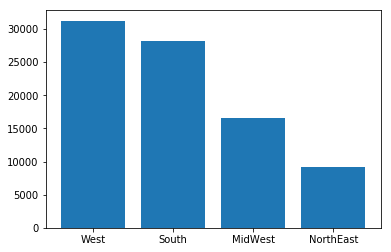

In [18]:
state=df['State'].value_counts()
plt.bar(state.index,state)

In [19]:
# from folium.plugins import MarkerCluster


# m = folium.Map(location=[44, -73], zoom_start=5)

# marker_cluster = MarkerCluster().add_to(m)

# geolist=list(zip(df.Latitude.dropna(), df.Longitude.dropna()))
# for lat, long in geolist:
#     folium.Marker(location=[lat,long],
#         icon=None,
#         ).add_to(marker_cluster)


# m

We only explored the location of crashes. The location variable has over 50% NaN values in it, thus it was excluded.

## 3. Airport name

Text(0, 0.5, 'percentage(%)')

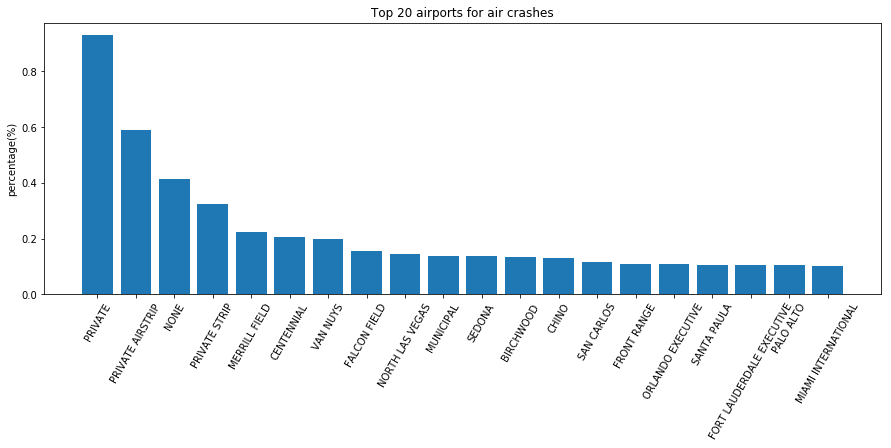

In [20]:
df['Airport Name']=df['Airport Name'].str.upper()
name=df['Airport Name'].value_counts()
name=name/sum(name)*100
plt.figure(figsize=(15,5))
plt.bar(name[:20].index,name[:20])
plt.gca().tick_params(axis='x', rotation=60)
plt.title('Top 20 airports for air crashes')
plt.ylabel('percentage(%)')

Airport crashes happened in Private airport the most. Since including all airport names is unnecessary, I simplified this feature as 'private or public'. 

In [21]:
# exclude unknown or none values
df=df[df['Airport Name']!='NONE']
df=df[df['Airport Name']!='UNKNOWN']

air=df['Airport Name'].copy()
air[air=='PRIVATE AIRSTRIP']='PRIVATE'
air[air=='PRIVATE STRIP']='PRIVATE'
air[air!='PRIVATE']='PUBLIC'
air.value_counts()

PUBLIC     83180
PRIVATE     1569
Name: Airport Name, dtype: int64

In [22]:
df['Airport Name']=air

## 4. Aircraft Damage

Text(0, 0.5, 'number of crashes')

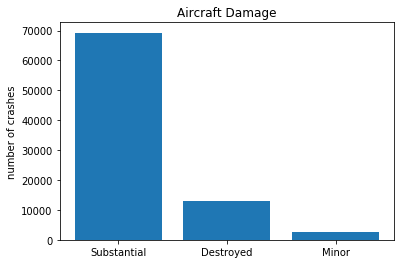

In [23]:
damage=df['Aircraft Damage'].value_counts()
plt.bar(damage.index,damage)
plt.title('Aircraft Damage')
plt.ylabel('number of crashes')

## 5. Aircraft Category

Text(0, 0.5, 'percentage(%)')

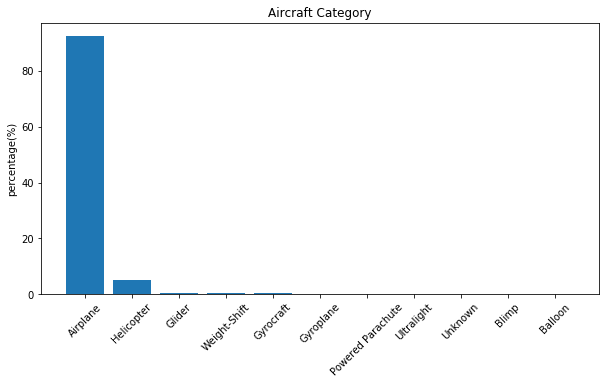

In [24]:
damage=df['Aircraft Category'].value_counts()
damage=damage/sum(damage)*100
plt.figure(figsize=(10,5))
plt.bar(damage.index,damage)
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Aircraft Category')
plt.ylabel('percentage(%)')

In [25]:
# excluded unknown values
df=df[df['Aircraft Category']!='Unknown']
# categorized into 3 values
ac=df['Aircraft Category'].copy()
ac[(ac!='Airplane') & (ac!='Helicopter')]='Others'
ac.value_counts()

Others        55809
Airplane      27402
Helicopter     1513
Name: Aircraft Category, dtype: int64

In [26]:
df['Aircraft Category']=ac

## Make

62.79802653321372

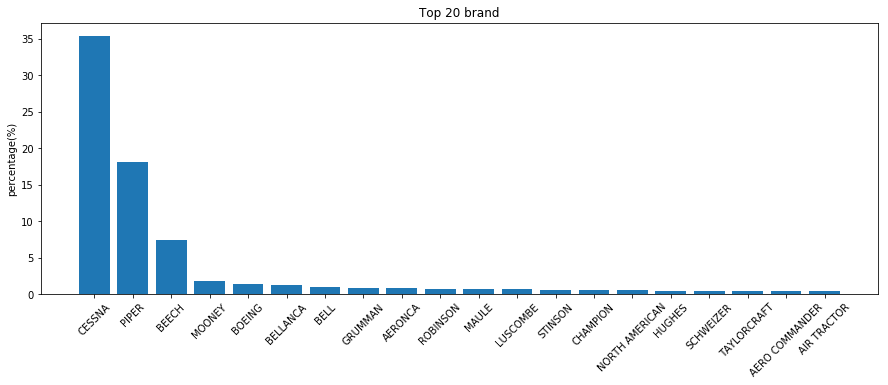

In [27]:
df['Make']=df['Make'].str.upper()
make=df['Make'].value_counts()
make=make/sum(make)*100
plt.figure(figsize=(15,5))
plt.bar(make[:20].index,make[:20])
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Top 20 brand')
plt.ylabel('percentage(%)')
sum(make[:4])

Top 3 brands (Cessna, Piper, Beech) take over 50%. To reduce the levels of variable, brands were categorized into 4 different values(Cessna, Piper, Beech, Others).

In [28]:
brand=df['Make'].copy()
brand[(brand!='CESSNA')&(brand!='PIPER')&(brand!='BEECH')]='OTHER'
brand.value_counts()

OTHER     33062
CESSNA    30027
PIPER     15337
BEECH      6298
Name: Make, dtype: int64

In [29]:
df['Make']=brand

## Model

Text(0, 0.5, 'percentage(%)')

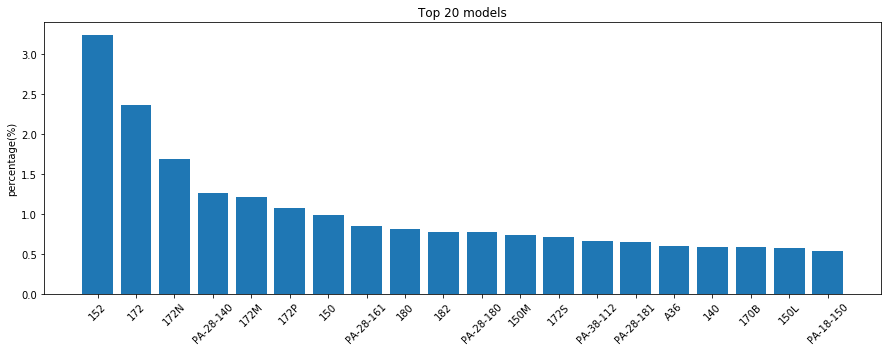

In [30]:
model=df['Model'].value_counts()
model=model/sum(model)*100
plt.figure(figsize=(15,5))
plt.bar(model[:20].index,model[:20])
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Top 20 models')
plt.ylabel('percentage(%)')

## Amateur Built

In [31]:
df['Amateur Built'].value_counts()

No     75376
Yes     9348
Name: Amateur Built, dtype: int64

## Number of Engines

In [32]:
df['Number of Engines'].value_counts()

1.0     72102
2.0     11499
3.0       451
0.0       363
4.0       307
18.0        2
Name: Number of Engines, dtype: int64

## Engine Type

In [33]:
df['Engine Type'].value_counts()

Reciprocating       77028
Turbo Prop           3477
Turbo Fan            1688
Turbo Shaft          1390
Turbo Jet             703
Unknown               415
None                    9
Electric                6
REC, ELEC               4
TJ, REC, REC, TJ        2
REC, TJ, TJ             2
Name: Engine Type, dtype: int64

In [34]:
# Remove unknown and none values
df=df[(df['Engine Type']!='Unknown')&(df['Engine Type']!='None')]

## Purpose of Flight

78.70818505338079

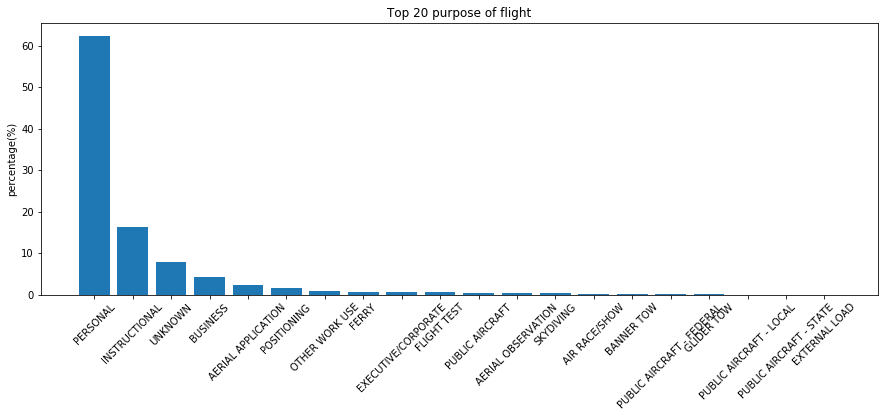

In [35]:
df['Purpose of Flight']=df['Purpose of Flight'].str.upper()
pof=df['Purpose of Flight'].value_counts()
pof=pof/sum(pof)*100
plt.figure(figsize=(15,5))
plt.bar(pof[:20].index,pof[:20])
plt.gca().tick_params(axis='x',rotation=45)
plt.title('Top 20 purpose of flight')
plt.ylabel('percentage(%)')
sum(pof[:2])

In [36]:
purpose=df['Purpose of Flight'].copy()
purpose[(purpose!='PERSONAL')&(purpose!='INSTRUCTIONAL')]='OTHER'
purpose.value_counts()

PERSONAL         52538
OTHER            17949
INSTRUCTIONAL    13813
Name: Purpose of Flight, dtype: int64

In [37]:
df['Purpose of Flight']=purpose

## Weather Condition

In [38]:
df['Weather Condition'].value_counts()
# remove unk

VMC    79257
IMC     4799
UNK      244
Name: Weather Condition, dtype: int64

## Broad Phase of Flight

In [39]:
df['Broad Phase of Flight'].value_counts()

LANDING        31834
TAKEOFF        21920
APPROACH       11217
MANEUVERING     4434
CRUISE          3840
TAXI            3583
GO-AROUND       2607
CLIMB           1636
STANDING        1464
DESCENT         1410
UNKNOWN          238
OTHER            117
Name: Broad Phase of Flight, dtype: int64

In [40]:
# Remove unknown values
df=df[df['Broad Phase of Flight']!='UNKNOWN']

# Outcome variable

In [41]:
injury=df[['Injury Severity','Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']]
injury[injury['Injury Severity']=='Non-Fatal']
injury.head()

,Injury Severity,Total Serious Injuries,Total Minor Injuries,Total Uninjured
0,Non-Fatal,NaN,NaN,1.0
2,Non-Fatal,NaN,NaN,1.0
3,Non-Fatal,NaN,NaN,1.0
14,Non-Fatal,0.0,0.0,1.0
16,Fatal(4),0.0,0.0,0.0


Since there are a lot of NaN values (it indicates no information rather than just 0), I decided to simplify the outcome variable which comprised of 'Non-Fatal/Incident or Fatal' using 'Injury Severity' column 

In [42]:
# drop unavailable cases
df=df[df['Injury Severity']!='Unavailable']

In [43]:
t=df['Injury Severity'].copy()
t[(t=='Non-Fatal')|(t=='Incident')]=0
t[t!=0]=1
df['Injury Severity']=t
t.shape

(84038,)

# Features

In [44]:
features=df[['Month', 'Day','State','Airport Name','Aircraft Damage','Aircraft Category',
            'Make','Amateur Built', 'Number of Engines', 'Engine Type',
            'Purpose of Flight','Broad Phase of Flight','Weather Condition']]

In [45]:
features.head()

,Month,Day,State,Airport Name,Aircraft Damage,Aircraft Category,Make,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Broad Phase of Flight,Weather Condition
0,12,Saturday,West,PUBLIC,Substantial,Airplane,OTHER,Yes,1.0,Reciprocating,PERSONAL,APPROACH,VMC
2,8,Wednesday,South,PUBLIC,Substantial,Airplane,OTHER,Yes,1.0,Reciprocating,PERSONAL,LANDING,VMC
3,7,Monday,MidWest,PUBLIC,Substantial,Airplane,OTHER,Yes,1.0,Reciprocating,PERSONAL,CRUISE,VMC
14,9,Monday,South,PUBLIC,Substantial,Others,CESSNA,No,1.0,Reciprocating,OTHER,APPROACH,VMC
16,4,Tuesday,West,PUBLIC,Destroyed,Others,OTHER,No,2.0,Turbo Prop,OTHER,APPROACH,IMC


In [46]:
# Remove white space in column names
features.columns=features.columns.str.replace(' ','')

In [47]:
data=features
data['Outcome']=t
data.head()

/Users/yunjin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Month,Day,State,AirportName,AircraftDamage,AircraftCategory,Make,AmateurBuilt,NumberofEngines,EngineType,PurposeofFlight,BroadPhaseofFlight,WeatherCondition,Outcome
0,12,Saturday,West,PUBLIC,Substantial,Airplane,OTHER,Yes,1.0,Reciprocating,PERSONAL,APPROACH,VMC,0
2,8,Wednesday,South,PUBLIC,Substantial,Airplane,OTHER,Yes,1.0,Reciprocating,PERSONAL,LANDING,VMC,0
3,7,Monday,MidWest,PUBLIC,Substantial,Airplane,OTHER,Yes,1.0,Reciprocating,PERSONAL,CRUISE,VMC,0
14,9,Monday,South,PUBLIC,Substantial,Others,CESSNA,No,1.0,Reciprocating,OTHER,APPROACH,VMC,0
16,4,Tuesday,West,PUBLIC,Destroyed,Others,OTHER,No,2.0,Turbo Prop,OTHER,APPROACH,IMC,1


In [48]:
data.columns

Index(['Month', 'Day', 'State', 'AirportName', 'AircraftDamage',
       'AircraftCategory', 'Make', 'AmateurBuilt', 'NumberofEngines',
       'EngineType', 'PurposeofFlight', 'BroadPhaseofFlight',
       'WeatherCondition', 'Outcome'],
      dtype='object')

In [49]:
data.isna().sum()

Month                 0
Day                   0
State                 0
AirportName           0
AircraftDamage        0
AircraftCategory      0
Make                  0
AmateurBuilt          0
NumberofEngines       0
EngineType            0
PurposeofFlight       0
BroadPhaseofFlight    0
WeatherCondition      0
Outcome               0
dtype: int64

In [50]:
from patsy import dmatrices

# create dummy variables
y, X = dmatrices('Outcome ~ C(Month) + C(Day)+ C(AirportName) + C(AircraftCategory) + C(Make) + C(AmateurBuilt) + NumberofEngines + C(EngineType) + C(PurposeofFlight) + C(BroadPhaseofFlight) + C(WeatherCondition)', data, return_type="dataframe")

X=X.drop('Intercept',axis=1)
y=t
X.head()

,C(Month)[T.2],C(Month)[T.3],C(Month)[T.4],C(Month)[T.5],C(Month)[T.6],C(Month)[T.7],C(Month)[T.8],C(Month)[T.9],C(Month)[T.10],C(Month)[T.11],...,C(BroadPhaseofFlight)[T.GO-AROUND],C(BroadPhaseofFlight)[T.LANDING],C(BroadPhaseofFlight)[T.MANEUVERING],C(BroadPhaseofFlight)[T.OTHER],C(BroadPhaseofFlight)[T.STANDING],C(BroadPhaseofFlight)[T.TAKEOFF],C(BroadPhaseofFlight)[T.TAXI],C(WeatherCondition)[T.UNK],C(WeatherCondition)[T.VMC],NumberofEngines
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


## Correlation among the features and the outcome variable

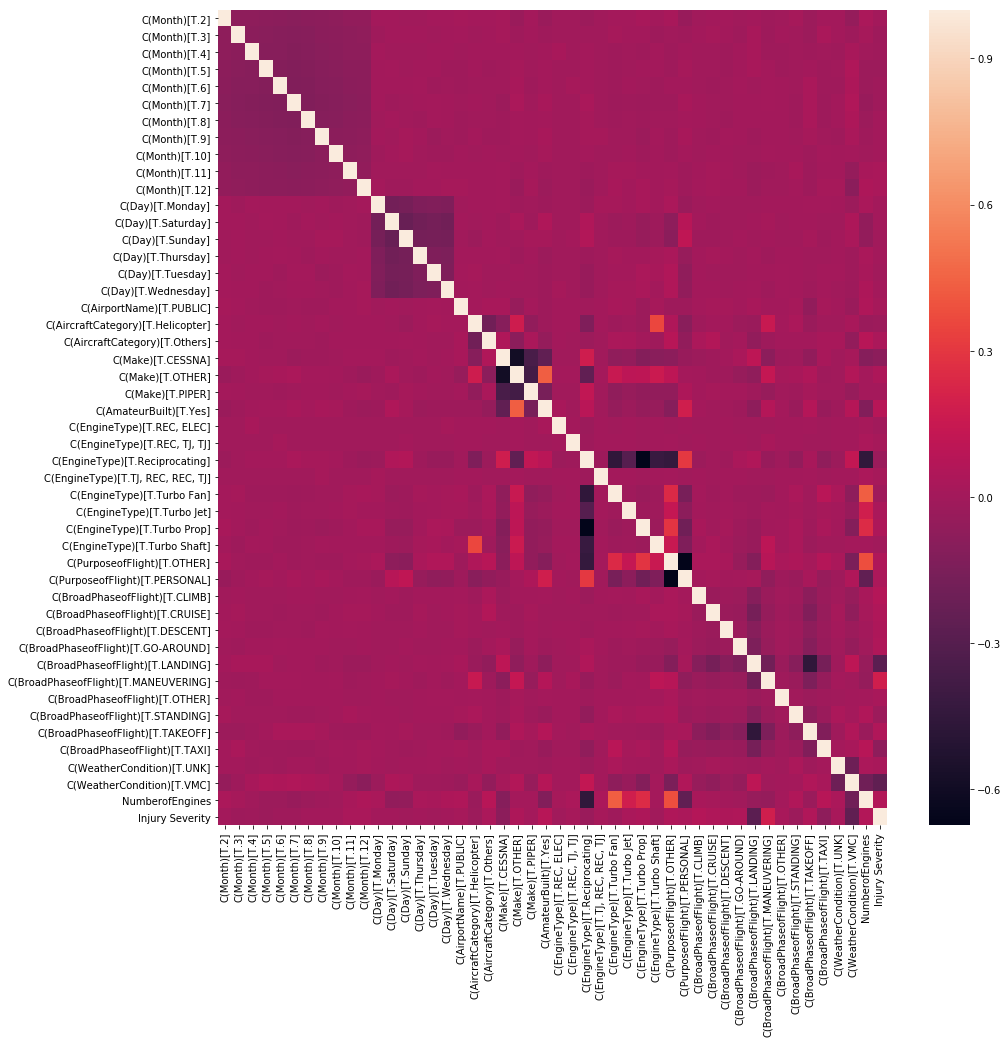

In [51]:
corrmat=X.join(t.astype(int)).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat)

In [52]:
corrmat['Injury Severity'].sort_values()[:5]

C(BroadPhaseofFlight)[T.LANDING]   -0.277463
C(WeatherCondition)[T.VMC]         -0.257468
C(Make)[T.CESSNA]                  -0.083806
C(BroadPhaseofFlight)[T.TAXI]      -0.077380
C(EngineType)[T.Reciprocating]     -0.030103
Name: Injury Severity, dtype: float64

# Modeling
# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
neighbors.fit(X,y.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [60]:
from sklearn.model_selection import cross_val_score

print('\nCross Validation\n')
score = cross_val_score(neighbors, X, y.astype(int), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Cross Validation

Accuracy: 0.90 (+/- 0.01)


# Random Forest

In [ ]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
rfc.fit(X,y.astype(int))
print('\nCross Validation\n')
score = cross_val_score(rfc, X, y.astype(int), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

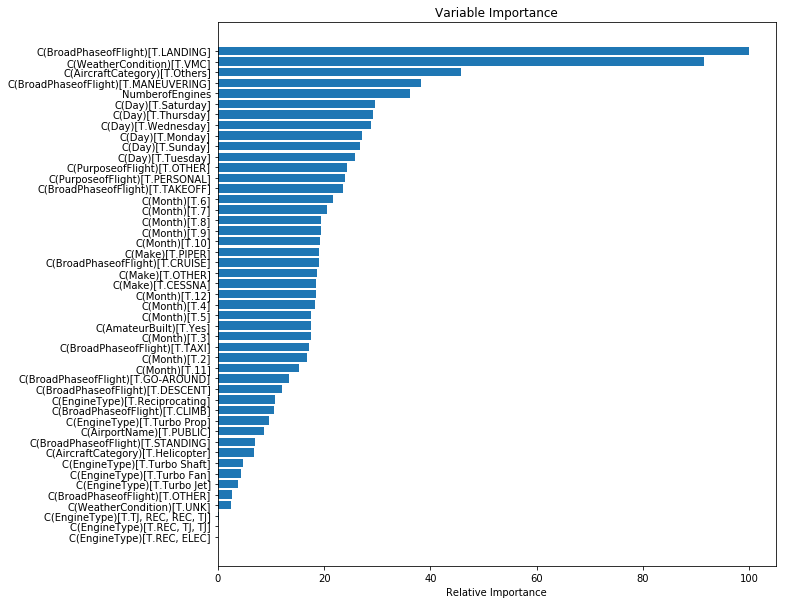

In [68]:

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Gradient Boosting

In [66]:
from sklearn import ensemble

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
# Initialize and fit the model.
gbc = ensemble.GradientBoostingClassifier(**params)
print('\nCross Validation\n')
score = cross_val_score(gbc, X, y.astype(int), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))




Cross Validation

Accuracy: 0.87 (+/- 0.01)


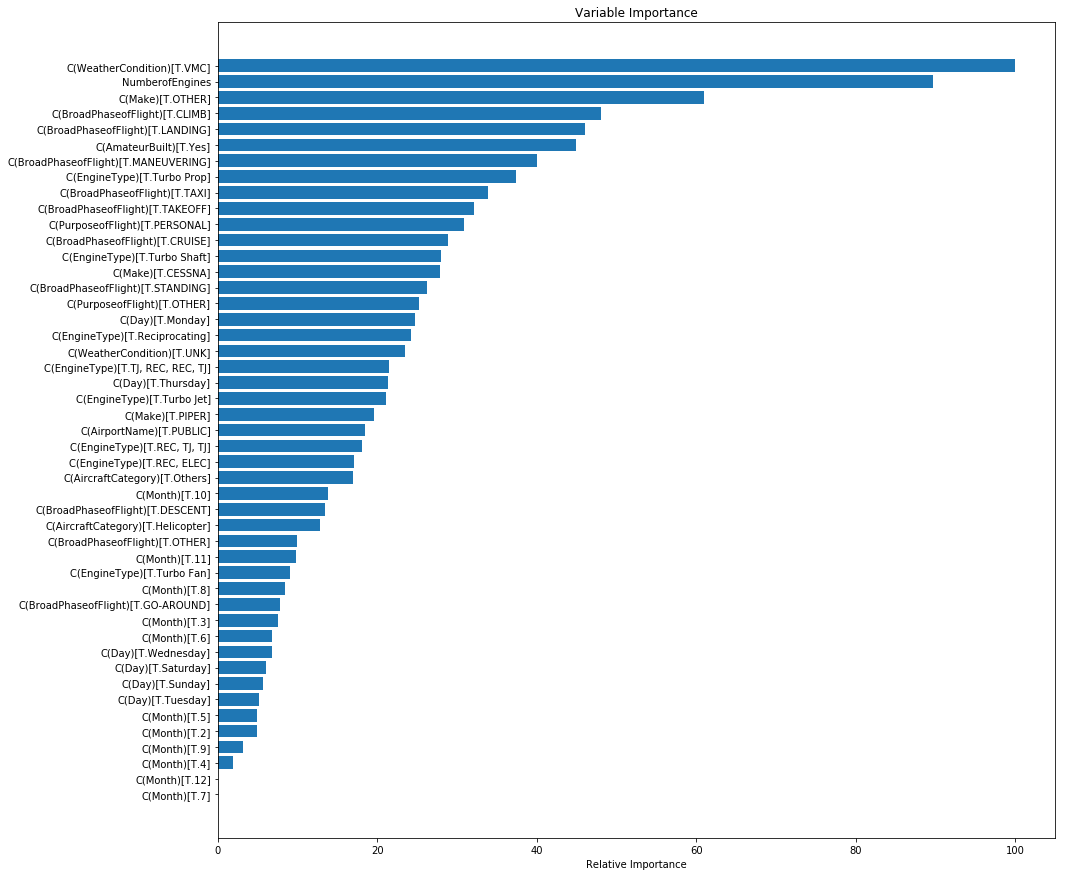

In [69]:
gbc.fit(X,y.astype(int))
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(15,15))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=1)
svc.fit(X,y.astype(int))
print('\nCross Validation\n')
score = cross_val_score(svc, X, y.astype(int), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Cross Validation



1. How does it can be applied
2. Why does the gradient boosting modeling have pretty lower accuracy compared to others?
3. Why did I pick these modeling methods?
